# Atividade Basica

 π via Monte Carlo (etapa 1) Considere um círculo de raio r = 1 inscrito em um quadrado de lado 2 r = 2 . A área do círculo é π r 2 = π . A área do quadrado é 4 . A razão entre a área do círculo e a área do quadrado é π / 4 . Se gerarmos N pontos aleatórios uniformemente distribuídos no quadrado, a fração de pontos que cairão dentro do círculo será π / 4 . Assim, podemos estimar π como 4 vezes a fração de pontos que caíram dentro do círculo. Como visto em aula, pode considerar o círculo e quadrados completos, ou apenas o primeiro quadrante. Varie o número de pontos sorteados N para ver como o resultado muda. Implemente na forma de uma função com assinatura:

In [1]:
import numpy as np
def pi_monte_carlo(N):
    '''
    Calcula e retorna o valor aproximado de pi via Monte Carlo de n.

    Argumentos
    ----------
    n : int
        O número de pontos para a aproximação de pi.

    Retorna
    -------
    int
        O valor aproximado de pi.
    '''
    #gera N pontos aleatorios em xy
    rng = np.random.default_rng()
    coordenadas = rng.random((2,N),float)

    #Eleva as coordenadas ao quadado
    [x,y] = coordenadas**2
    quadrado = circulo = 0

    #calcula o numero de valores dentro do circulo
    for i in range(N):

        if (x[i] + y[i]) <= 1:
            circulo += 1

    #estima o valor de pi
    estimativa_pi = circulo*4/N

    return estimativa_pi

print(pi_monte_carlo(1000000))

3.141172




  Mapa logístico, caos e fractais (etapa 1) O mapa logístico é definido pela equação x n + 1 = r x n ( 1 − x n ) , onde x n é a população (normalizada entre 0 e 1) no instante de tempo discreto n , e r é o parâmetro de crescimento. Para um dado valor de r , a população x n pode convergir para um valor fixo, oscilar entre dois valores, ou oscilar entre mais de dois valores, ou simplesmente enlouquecer e parecer aleatório.

  a) Implemente uma função mapa_logistico(r, x0, N) que recebe o parâmetro de crescimento r, a condição inicial x0 (i.e. x 0 para n = 0 ), e o número de iterações N, e retorna uma lista com os valores de x n para n = 0 , 1 , 2 , … , N .

  b) Faça gráficos de x n vs n (de 0 a 1000 pelo menos) para r = 2 , 3.3 , 3.5 , 3.9 , sempre iniciando de x 0 = 1 / 2 . Talvez seja melhor usar um gráfico de linhas (plt.plot) para r = 2 , e um gráfico de pontos (plt.scatter) para os outros valores de r . O que você observa?


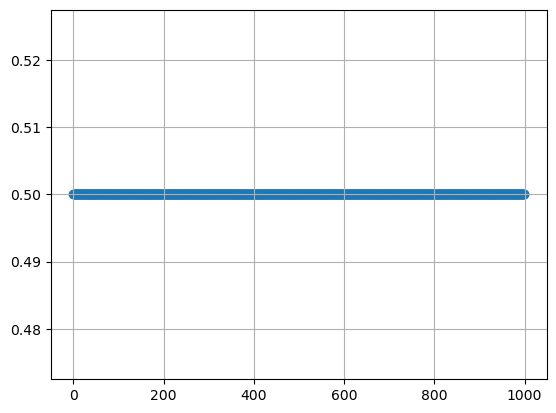

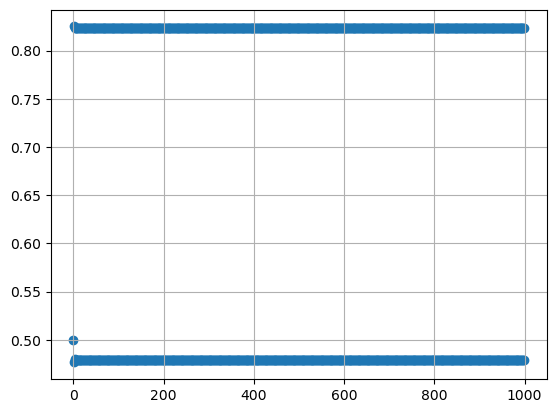

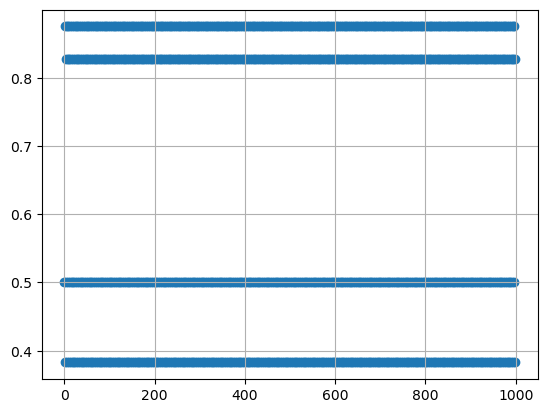

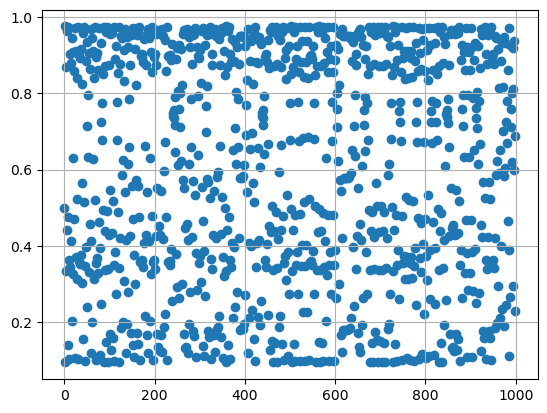

In [43]:
import numpy as np
import matplotlib.pyplot as plt

def mapa_logistico(r,x0, N):
    '''
    Calcula e retorna o mapa logistico de uma pupulação de com parametro de crescimento r em um tempo discreto N.

    Argumentos
    ----------
    r : float
        Taxa de crecimento
    x0 : float
        Valor inicial de x
    n : int
        O número de passos.
    Retorna
    -------
    x,y : array , array
        O .
    '''

    x = []
    t = np.arange(N)
    x.append(x0)

    for i in range(N-1):
        x.append(r*x[i]*(1-x[i]))

    return  x,t

r=[2,3.3,3.5,3.9]
for i in r:
    y,x = mapa_logistico(i,0.5,1000)
    plt.scatter(x,y)
    plt.grid()
    plt.show()



# Atividade intermediaria


    π via Monte Carlo (etapa 2) Modifique sua função pi_monte_carlo(N) para que agora receba um booleando retorna_pontos que indica se a função deve retornar os pontos sorteados separados em duas listas: dentro e fora. Usando estas listas, faça um gráfico dos pontos sorteados, com os pontos dentro do círculo em azul e os pontos fora em vermelho. A assinatura da função deve ser:


3.112
3.142516


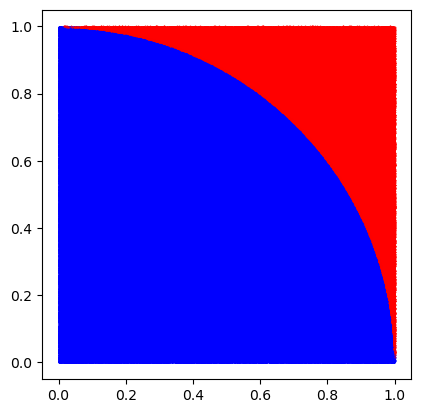

In [ ]:
import numpy as np
def pi_monte_carlo2(N,retorna_pontos = False):
    '''
    Calcula e retorna o valor aproximado de pi via Monte Carlo de n.

    Argumentos
    ----------
    n : int
        O número de pontos para a aproximação de pi.
    retorna_pontos : bool
        Se True retorna o numero de pontos dentro e fora, se False retorna somente o valor aproximado de pi.

    Retorna
    -------
    int
        O valor aproximado de pi.
    int
        O numero de pontos dentro
    int
        O numero de pontos fora
    '''
    #gera N pontos aleatorios em xy
    rng = np.random.default_rng()
    coordenadas = rng.random((2,N),float)

    #Eleva as coordenadas ao quadado
    [x,y] = coordenadas**2

    #calcula o numero de valores dentro




    if retorna_pontos:
        #calcula o numero de valores dentro fora do circulo
        fora = [[],[]]
        dentro = [[],[]]
        for i in range(N):
            if (x[i] + y[i]) <= 1:
                dentro[0].append(coordenadas[0][i])
                dentro[1].append(coordenadas[1][i])
            else:
                fora[0].append(coordenadas[0][i])
                fora[1].append(coordenadas[1][i])
        #estima o valor de pi
        estimativa_pi = len(dentro[1])*4/N
        
        return estimativa_pi, dentro,fora
    
    else:
        #calcula o numero de valores dentro
        dentro = [[],[]]
        for i in range(N):
            if (x[i] + y[i]) <= 1:
                dentro[0].append(coordenadas[0][i])
                dentro[1].append(coordenadas[1][i])
        #estima o valor de pi
        estimativa_pi = len(dentro[1])*4/N
        return estimativa_pi

print(pi_monte_carlo2(1000))

pi ,dentro,fora = pi_monte_carlo2(1000000,True)
print(pi)
plt.gca().set_aspect('equal', adjustable='box')
plt.scatter(dentro[0],dentro[1],color = 'blue',s=0.1)
plt.scatter(fora[0],fora[1],color = 'red',s=0.1)

Mapa logístico, caos e fractais (etapa 2) Nesta etapa iremos utilizar apenas os últimos M valores de x n gerados pela sua função mapa_logistico(r, x0, N). Sugiro usar N = 2000 e M = 1000 , mas se ficar pesado, reduza M . Faça um loop de r = 1 até 4 em passos de 0.1 (use np.arange), e para cada valor de r , plote os últimos M pontos x n no eixo y, e o valor de r no eixo x, sugiro fazer assim:

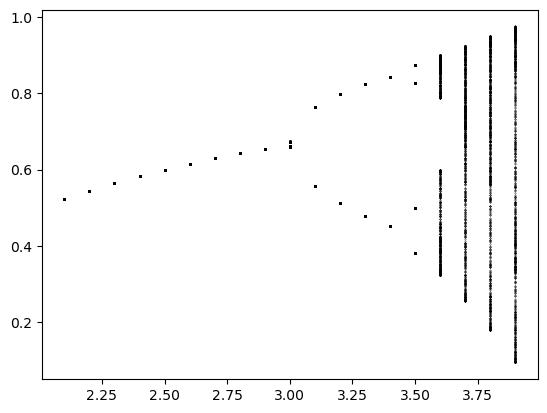

In [94]:
import numpy as np
import matplotlib.pyplot as plt


def mapa_logistico4(x0, N,M):
    '''
      Calcula e retorna o mapa logistico de uma pupulação de com parametro de crescimento r em um tempo discreto N.

    Argumentos
    ----------
    r : float
        Taxa de crecimento
    x0 : float
        Valor inicial de x
    N : int
        O número de passos.
    M : int
        O numero de passos imprimidos.
    Retorna
    -------
    0
    '''
    y = []
    x = []
    r = np.arange(2.1,4,0.1)
    
    for j in range(len(r)):

      y.append(r[j]*np.ones(M))
      a = [x0]
      for i in range(N-1):
        a.append(r[j]*a[i]*(1-a[i]))
      x.append(a[N-M:]) 
     
      
   
    return x,y

x,r = mapa_logistico4(0.5,2000,1000)
for M in range(len(r)):
    plt.plot(r[M],x[M], 'k.', markersize=0.5)
plt.show()


# Atividade avançada

 π via Monte Carlo (etapa 3) Seja E N = | π − π N | / π o erro relativo da estimativa de π com N pontos. Faça gráficos de E N em função de N para N = 10 1 , 10 2 , 10 3 , 10 4 , 10 5 , 10 6 . Compare os gráficos feitos em escala linear (plt.plot), log-log (plt.loglog), e semi-logs (plt.semilogx ou plt.semilogy). O que você observa? Faça um ajuste dos dados com uma função apropriada usando numpy.polyfit ou scipy.optimize.curve_fit.

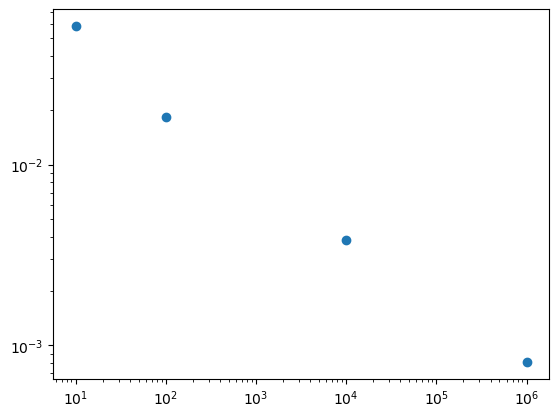

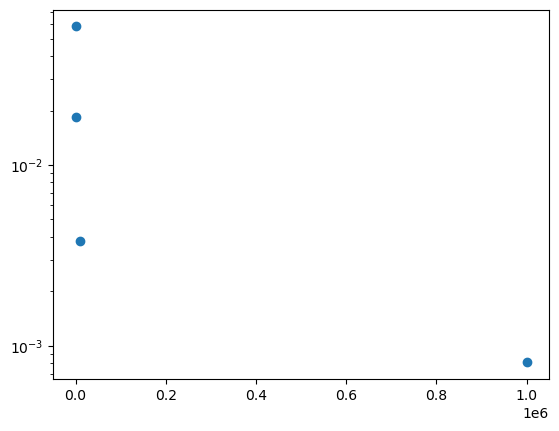

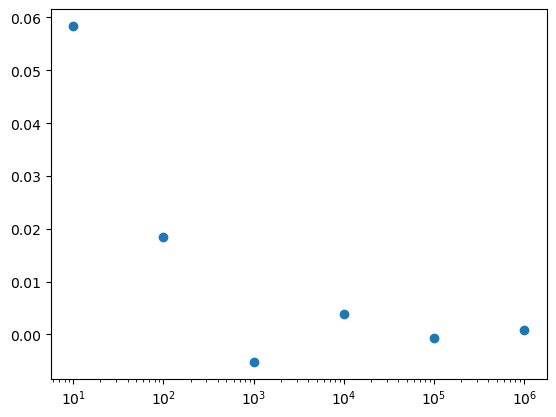

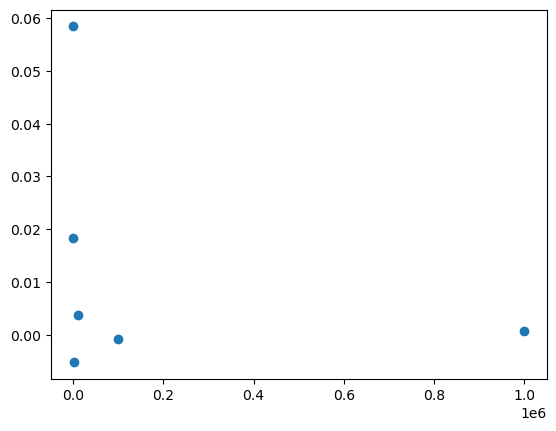

In [88]:
x=[]
y=[]

for j in range(6):
    valores = []
    for i in range(10):
        valores.append(pi_monte_carlo3(10**(j+1))-np.pi)
    x.append(10**(j+1))
    y.append(np.mean(valores))
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.scatter(x,y)
plt.xscale('linear')
plt.yscale('log')
plt.show()
plt.scatter(x,y)
plt.xscale('log')
plt.yscale('linear')
plt.show()
plt.scatter(x,y)
plt.xscale('linear')
plt.yscale('linear')
plt.show()

Mapa logístico, caos e fractais (etapa 3) Modifique o plot da etapa 2 deste exercício para que entre no modo interativo do matplotlib, de forma a permitir que você possa dar zoom em regiões interessantes do gráfico. Para uma boa visualização, talvez seja necessário rodar com valores maiores de M . Sempre use N = M + 1000 . O que você observa ao dar zoom no gráfico?

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def mapa_logistico3(x0, N,M):
    '''
      Calcula e retorna o mapa logistico de uma pupulação de com parametro de crescimento r em um tempo discreto N.

    Argumentos
    ----------
    r : float
        Taxa de crecimento
    x0 : float
        Valor inicial de x
    N : int
        O número de passos.
    M : int
        O numero de passos imprimidos.
    Retorna
    -------
    0
    '''
    y = []
    x = []
    npontos = 2000
    r = np.linspace(1,4,npontos)
    t = (np.arange(N,dtype=float))
    
    for j in range(npontos):

      L = round(M*(((j+1)/npontos)**(4)))+1
      y.extend(r[j]*np.ones(L))
      #x.append(x0)
      a = [x0]
      for i in range(N-1):
        a.append(r[j]*a[i]*(1-a[i]))
      x.extend(a[N-L:]) 
     
    return x,y

#plt.figure(figsize=(16,9))
y,x = mapa_logistico3(0.5,2000,1000)
np.savez('caos.npz',x=x,y=y)

 via Monte Carlo (etapa 4) Implemente uma versão eficiente do cálculo de π via Monte Carlo, que não use loops e ifs explícitos, mas sim operações vetorizadas do numpy. Compare o tempo de execução desta versão com a versão lenta que usa loops e ifs. Pode usar o %timeit do jupyter para os primeiros testes, mas como poderia fazer o gráfico do tempo de execução como função do número de pontos sorteados N ?

In [ ]:
import numpy as np
def pi_monte_carlo3(N):
    '''
    Calcula e retorna o valor aproximado de pi via Monte Carlo de n.

    Argumentos
    ----------
    n : int
        O número de pontos para a aproximação de pi.

    Retorna
    -------
    int
        O valor aproximado de pi.
    '''
    #gera N pontos aleatorios em xy
    rng = np.random.default_rng()
    coordenadas = rng.random((2,N),float)

    #Eleva as coordenadas ao quadado
    [x,y] = coordenadas**2
    r= (x+y)-1/2
    fora = sum(np.round(r))
    dentro = N - fora

    #estima o valor de pi
    estimativa_pi = dentro*4/N

    return estimativa_pi
pi_monte_carlo3(100000)

3.14308

In [183]:
%timeit pi_monte_carlo3(1000000)

93.9 ms ± 2.12 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [97]:
%timeit pi_monte_carlo(1000000)

326 ms ± 2.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
